In [18]:
import numpy as np 
import tensorflow as tf  
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import  Dense 
from sklearn.preprocessing import  StandardScaler 
from tensorflow.keras.datasets import  boston_housing 

import matplotlib.pyplot as plt

In [19]:
# 1️⃣ Load dataset
data=boston_housing.load_data()

(X_train,y_train),(X_test,y_test)=data


In [20]:
# 2️⃣ Scale the features
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train) 
X_test_scaled=scalar.transform(X_test)




In [21]:
# 3️⃣ Build the neural network model


model=Sequential([
    Dense(units=64,activation='relu',input_shape=(X_train.shape[1],)),
    Dense(units=32,activation='relu'),
    Dense(units=1,activation='relu')
])


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
# Compile the model
from tensorflow.keras.losses import  MeanSquaredError
model.compile(loss=MeanSquaredError,optimizer='adam',metrics=['mae'])

In [36]:
history=model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=300,verbose=1)

Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7566 - mae: 1.1941 - val_loss: 13.4026 - val_mae: 2.4471
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.0322 - mae: 1.2245 - val_loss: 13.4387 - val_mae: 2.4505
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5824 - mae: 1.1126 - val_loss: 13.5635 - val_mae: 2.4904
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.4472 - mae: 1.1729 - val_loss: 13.0813 - val_mae: 2.4516
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.1008 - mae: 1.2319 - val_loss: 13.6925 - val_mae: 2.4711
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.8094 - mae: 1.2091 - val_loss: 13.4493 - val_mae: 2.4829
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7470 - mae: 1.2211 - val_loss: 13.3288 - val_mae: 2.4741
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.8177 - mae: 1.1866 - val_loss: 13.1968 - val_mae: 2.4737
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - los

In [37]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f"Test MAE: {mae:.2f}, Test MSE: {loss:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.0003 - mae: 2.4164
Test MAE: 2.59, Test MSE: 13.10


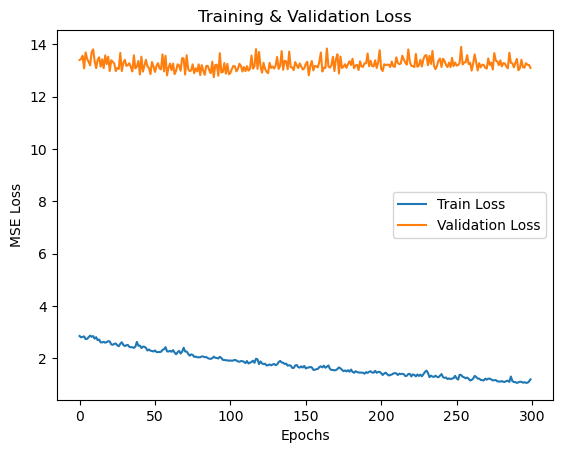

In [38]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend()
plt.title('Training & Validation Loss')
plt.show()

In [39]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,029 (35.27 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,020 (23.52 KB)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


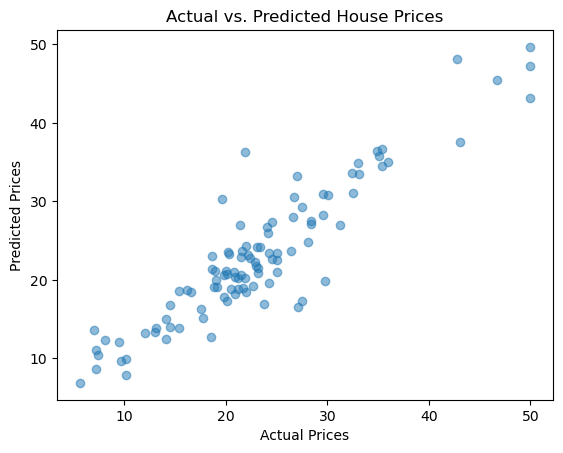

In [40]:
# Compare actual vs. predicted prices

y_pred=model.predict(X_test_scaled)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()